## In this homework, I find a dataset that contains the the lyrics for 57650 songs. And I think this dataset will be a good source to do the text mining.

## The dataset contains 4 columns:
---
* Artist
* Song Name
* Link to a webpage with the song (for reference). This is to be concatenated with http://www.lyricsfreak.com to form a real URL.
* Lyrics of the song, unmodified.

In [1]:
from wordcloud import WordCloud, STOPWORDS
from pprint import pprint
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np

stopwords = set(STOPWORDS)
# from nltk.corpus import stopwords

# stopwords = stopwords.words('english')
# stopwords.append("verse")
# stopwords.append("chorus")
# stopwords.append("choru")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



## Firstly, I do some preprocessing on the data. I want to know what's favorite words that the artists like to use.
## So, I define some helper function to clean the data.

In [2]:
dat = pd.read_csv("./songdata.csv")

# defining a couple of helper functions
def clean(sting):
    char_to_rem = ["\n", "'", ",", "]", "[", ")", "("]

    for c in char_to_rem:
        sting = sting.replace(c, "")

    final_sting = []

    for word in sting.split(' '):
        word = word.lower()
        if word == "fag" or word == "ho" or word == "hoe" or word == "ass":
            final_sting.append(word)
            continue
            
        if len(word) > 3 and word not in stopwords:
            final_sting.append(word)

    return final_sting


def update(dic1, dic2):
    for key, value in dic2.items():
        if key in dic1:
            dic1[key] = dic1[key] + dic2[key]
        else:
            dic1[key] = dic2[key]

## Next, I choose some quite famous musician or bands, and analyze the words they used. And I also calculate each word used by all the artist.


In [3]:
famous_artist=["Adele","Aerosmith","Air Supply","Ariana Grande","Avril Lavigne","Backstreet Boys","Bee Gees","Bob Dylan","Bob Marley","Carpenters"
,"David Guetta"
,"Ed Sheeran"
,"Drake"
,"Lady Gaga"
,"Maroon 5"
,"Oasis"
,"OneRepublic"
,"Queen"
,'Radiohead']
# famous_artist=dat[dat['artist'].isin(famous_artist)]
# print(group)

grouped_by_artist = dat.groupby('artist')

# saving the total words in this dict
# total number of songs
ar_di = {}
tot_words = {}
tot_words_list = []

artist_strings = {}

In [4]:
for artist_name, songs in grouped_by_artist:
    num_total_words = 0
    num_songs = 0
    artist_string = []
    
    words = {}
    for index, rows in songs.iterrows():
        num_songs += 1
        clean_text_list = clean(rows["text"])
        num_total_words += len(clean_text_list)

        tot_words_list += clean_text_list
        artist_string += clean_text_list

        for word in clean_text_list:
            if word in words:
                words[word] = words[word] + 1
            else:
                words[word] = 1

        update(tot_words, words)
        artist_strings[artist_name] = list(artist_string)

    if artist_name in famous_artist:
        print(artist_name)

        print ("Talkin 'bout ", artist_name)
        print ("Total words in all songs : ", num_total_words)

        for key, val in sorted(words.items(), key=lambda tup: (tup[1], tup[0]), reverse=True)[:5]:
            print ("\t **",key , "** used", val, "times")

        print ("\n\n")


Adele
Talkin 'bout  Adele
Total words in all songs :  6272
	 ** love ** used 160 times
	 ** dont ** used 130 times
	 ** know ** used 109 times
	 ** youre ** used 105 times
	 ** never ** used 98 times



Aerosmith
Talkin 'bout  Aerosmith
Total words in all songs :  17719
	 ** yeah ** used 348 times
	 ** love ** used 306 times
	 ** dont ** used 265 times
	 ** youre ** used 249 times
	 ** take ** used 187 times



Air Supply
Talkin 'bout  Air Supply
Total words in all songs :  13959
	 ** love ** used 501 times
	 ** know ** used 250 times
	 ** dont ** used 210 times
	 ** never ** used 189 times
	 ** will ** used 178 times



Ariana Grande
Talkin 'bout  Ariana Grande
Total words in all songs :  7164
	 ** baby ** used 237 times
	 ** know ** used 209 times
	 ** dont ** used 202 times
	 ** love ** used 186 times
	 ** cause ** used 117 times



Avril Lavigne
Talkin 'bout  Avril Lavigne
Total words in all songs :  14082
	 ** dont ** used 363 times
	 ** know ** used 323 times
	 ** youre ** used 2

## Next, Due to I've already preprocessd the data, I can directly use wordcloud to show what are the most frequently used words among all the artistis.

Now we'll try to make a word cloud out of this
Got the string


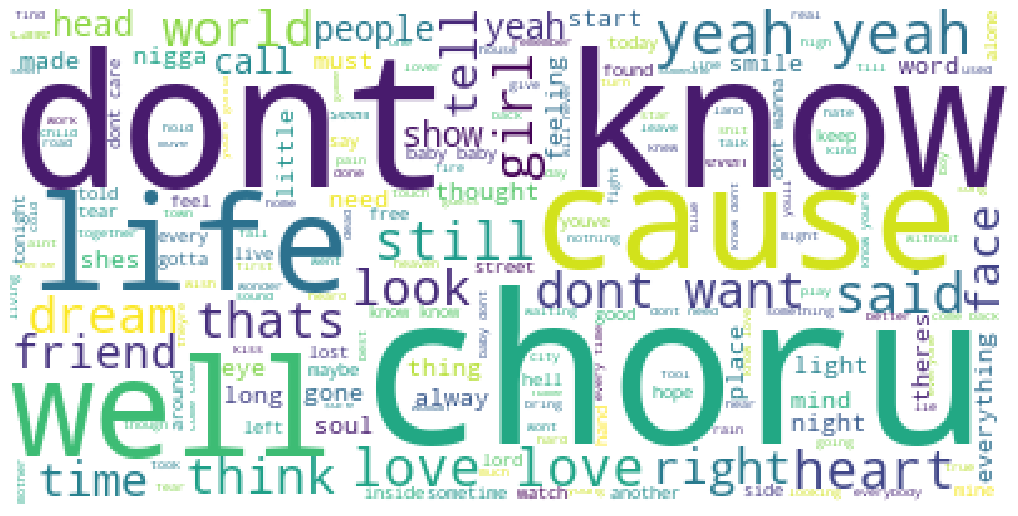

In [5]:
print("Now we'll try to make a word cloud out of this")
text = " ".join(tot_words_list)

print("Got the string")

import random

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

wc = WordCloud(max_words=1000, background_color="white").generate(text)

plt.figure(figsize=(18, 12))
plt.axis("off")
plt.imshow(wc)
# plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))

plt.savefig("wc_completelyrics.png")

## And I specifically want to know how many cuss words are being used by the artists.

20200
shit      4323
fuck      4126
nigga     3947
bitch     2847
ass       2008
ho        1065
dick       638
pussy      551
hoe        376
cock       160
nigger      64
cunt        42
tits        39
fag         14
dtype: int64


/home/brian/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  # This is added back by InteractiveShellApp.init_path()


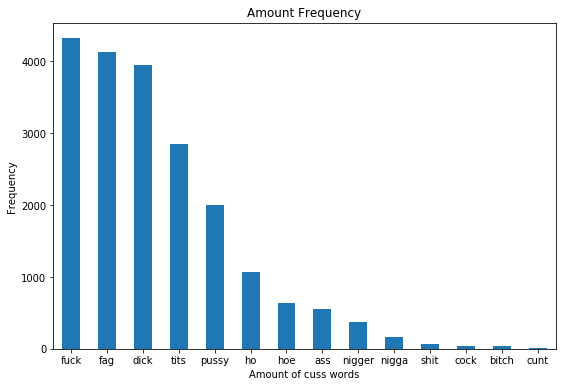

In [6]:
cuss_words = ["fuck", "fag", "dick", "tits", "pussy", "ho","hoe", "ass", "nigger","nigga", "shit", "cock", "bitch", "cunt"]

# preprocessing to update some counts
# tot_words_list["n-word"] = tot_words_list["nigger"] + tot_words_list["nigga"]
counts_cuss_words = [x for x in tot_words_list if x in cuss_words]

print(len(counts_cuss_words))

fig = plt.figure(figsize=(9, 6))

cuss_series = pd.Series.from_array(counts_cuss_words)
print(cuss_series.value_counts())

ax = cuss_series.value_counts().plot(kind='bar',rot=0)
ax.set_title("Amount Frequency")
ax.set_xlabel("Amount of cuss words")
ax.set_ylabel("Frequency")
ax.set_xticklabels(cuss_words)
# ax.xaxis.set_visible(False)

# plt.xticks(cuss_words)
plt.show()


# plt.savefig("bar_cuss_words.png")

In [7]:
artist_cuss = []

for artist in artist_strings.keys():
    counter = 0
    
    for sting in artist_strings[artist]:
        if sting in cuss_words:
            counter += 1
     
    artist_cuss.append((counter, artist))
sorted(artist_cuss, reverse=True)[:50]

[(1342, 'Lil Wayne'),
 (993, 'Insane Clown Posse'),
 (973, 'Ice Cube'),
 (763, 'Gucci Mane'),
 (739, 'Snoop Dogg'),
 (674, 'Drake'),
 (647, 'J Cole'),
 (589, 'Young Jeezy'),
 (586, 'Ying Yang Twins'),
 (568, 'Fabolous'),
 (528, 'Z-Ro'),
 (503, 'Notorious B.I.G.'),
 (426, 'Chris Brown'),
 (421, 'Eminem'),
 (412, 'Xzibit'),
 (399, 'Korn'),
 (390, 'Kanye West'),
 (377, 'Yo Gotti'),
 (371, 'Nicki Minaj'),
 (352, 'Wiz Khalifa'),
 (311, 'Wu-Tang Clan'),
 (303, 'Puff Daddy'),
 (296, 'Kid Rock'),
 (287, 'Outkast'),
 (282, 'YG'),
 (249, 'Young Buck'),
 (231, 'Youngbloodz'),
 (186, 'LL Cool J'),
 (174, 'Pitbull'),
 (137, 'R. Kelly'),
 (136, 'Yukmouth'),
 (127, 'The Weeknd'),
 (127, 'Migos'),
 (119, 'Marilyn Manson'),
 (118, 'Usher'),
 (111, 'Rihanna'),
 (99, 'Yung Joc'),
 (96, 'Flo-Rida'),
 (93, 'Rage Against The Machine'),
 (90, 'Pharrell Williams'),
 (89, 'Young Dro'),
 (88, 'Yelawolf'),
 (87, 'NOFX'),
 (83, 'Vanilla Ice'),
 (82, 'System Of A Down'),
 (77, 'Adam Sandler'),
 (73, 'Lady Gaga'),


### By the results, we can see f-word is the most frequently used, and the rapper Lil Wayne use the most cuss words in his songs.
****

## Classification

## Following, I will use some classification model to analyze the dataset I've been doing.

In [8]:
import seaborn
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import nltk
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import LatentDirichletAllocation

### Firstly, I will use k-mean clustering model

In [9]:
# components for features reduction
n_components = 5

# number of clusters we want
n_clusters = 5

# covert words into TFIDF metrics
tfidf = TfidfVectorizer(stop_words = 'english')
X_text = tfidf.fit_transform(dat['text'])

# reduce dimensions
svd = TruncatedSVD(n_components=n_components, random_state = 0)
X_2d = svd.fit_transform(X_text)

# fit k-mean clustering
kmeans = KMeans(n_clusters=n_clusters, random_state = 0)

# predict our clusters for each song
X_clustered = kmeans.fit_predict(X_2d)

# display by groups
df_plot = pd.DataFrame(list(X_2d), list(X_clustered))
df_plot = df_plot.reset_index()
df_plot.rename(columns = {'index': 'Cluster'}, inplace = True)
df_plot['Cluster'] = df_plot['Cluster'].astype(int)

print(df_plot.head())

print(df_plot.groupby('Cluster').agg({'Cluster': 'count'}))

   Cluster         0         1         2         3         4
0        3  0.172257 -0.041473 -0.036976  0.013546  0.028909
1        3  0.078635 -0.021322  0.005658  0.015955 -0.026425
2        3  0.110175  0.034562 -0.006568 -0.004240  0.021709
3        3  0.074691  0.072166  0.004439  0.018011 -0.007521
4        3  0.088499  0.081845  0.003083  0.019414 -0.008087
         Cluster
Cluster         
0          11634
1           4824
2           3050
3          35813
4           2329


## Then we plot the clustering situation in order.

Text(0.01, 0.5, 'Component n')

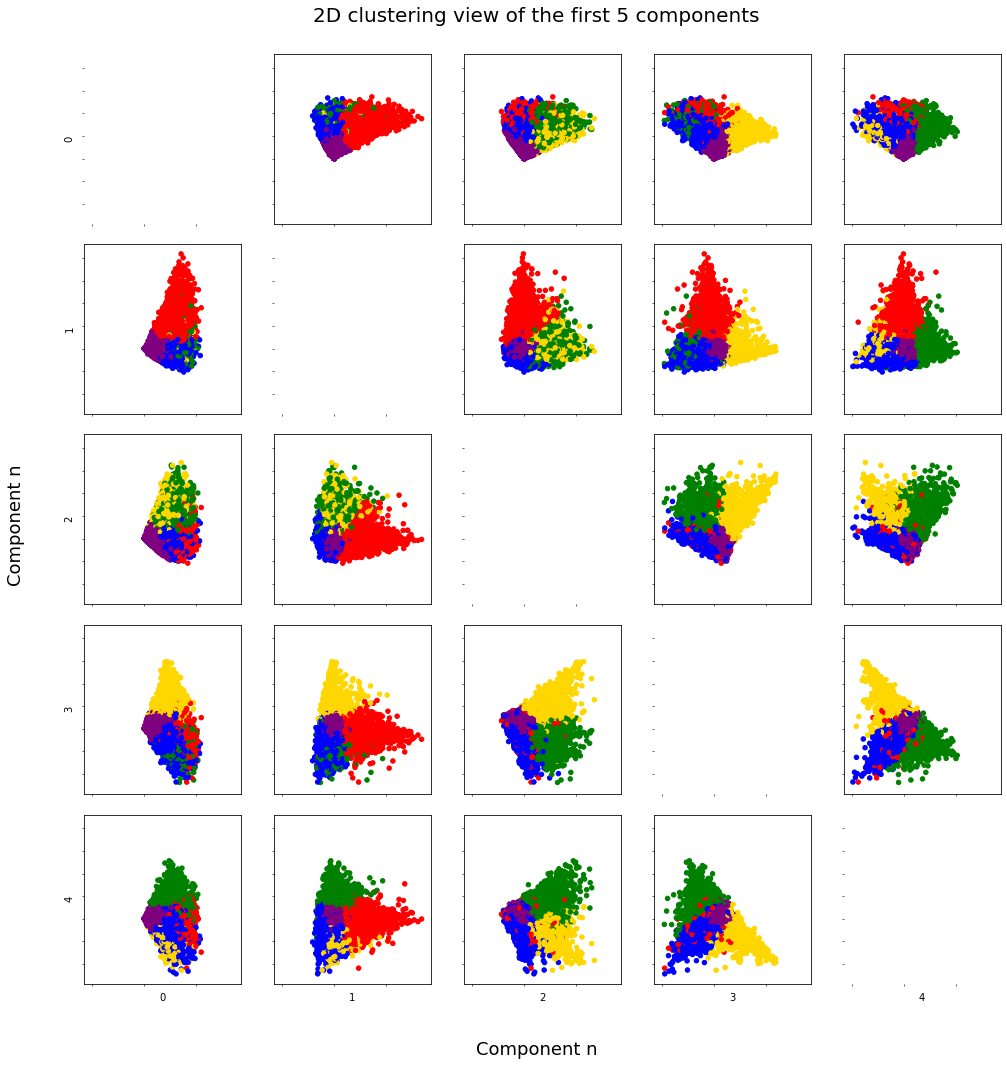

In [10]:
# make a column for color by clusters
col = df_plot['Cluster'].map({0:'b', 1:'r', 2: 'g', 3:'purple', 4:'gold'})

# variable for first n dimensions we want to plot
n = 5

# visualize the clusters by first n dimensions (reduced)
fig, ax = plt.subplots(n, n, sharex=True, sharey=True, figsize=(15,15))
fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

# plot it
k = 0
for i in range(0,n):
    for j in range(0,n):
        if i != j:
            df_plot.plot(kind = 'scatter', x=j, y=i, c=col, ax = ax[i][j], fontsize = 18)
        else:
            ax[i][j].set_xlabel(i)
            ax[i][j].set_ylabel(j)
            ax[i][j].set_frame_on(False)
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        
plt.suptitle('2D clustering view of the first {} components'.format(n), fontsize = 20)
fig.text(0.5, 0.01, 'Component n', ha='center', fontsize = 18)
fig.text(0.01, 0.5, 'Component n', va='center', rotation='vertical', fontsize = 18)

In [11]:
dat['Cluster'] = df_plot['Cluster']

# function for finding most significant words for each cluster
def generate_text(cluster):
    
    df_s = dat['text']
    y = dat['Cluster'].map(lambda x: 1 if x == cluster else 0)
    count = len(df_s)
    
    tfidf = TfidfVectorizer(stop_words = 'english')
    X = tfidf.fit_transform(df_s)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    clf = LogisticRegression(random_state = 0).fit(X_train, y_train)
    clf_d = DummyClassifier().fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    acc_d = clf_d.score(X_test, y_test)
    coef = clf.coef_.tolist()[0]
    w = tfidf.get_feature_names()
    coeff_df = pd.DataFrame({'words' : w, 'score' : coef})
    coeff_df = coeff_df.sort_values(['score', 'words'], ascending=[0, 1])
    coeff_df = coeff_df[:30]
    d = coeff_df.set_index('words')['score'].to_dict()
    return d, acc, acc_d

## Finally, I will use WordCloud to show which words are most frequently used in each cluster 

/home/brian/.local/lib/python3.6/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/brian/.local/lib/python3.6/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/brian/.local/lib/python3.6/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/brian/.local/lib/python3.6/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/brian/.local/lib/python3.6/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "s

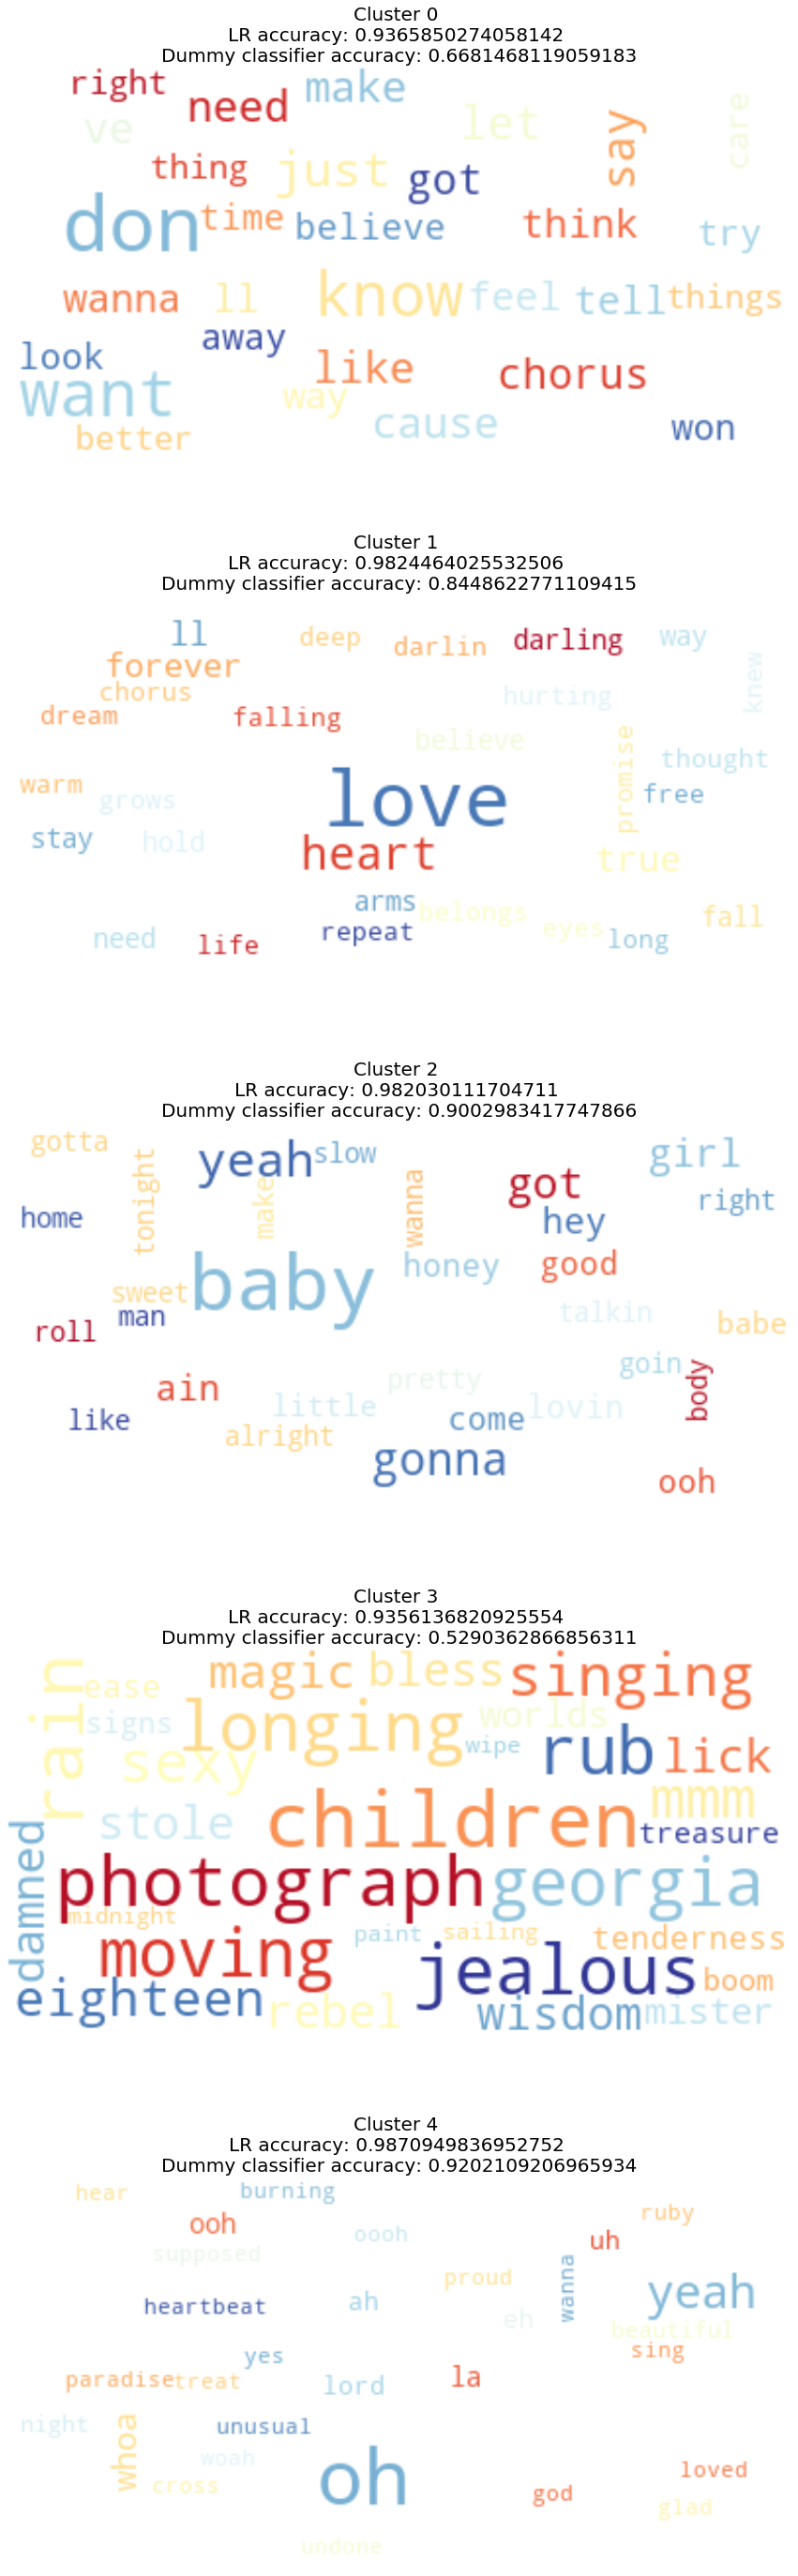

In [12]:
fig, ax = plt.subplots(n_clusters, sharex=True, figsize=(15,10*n_clusters))

for i in range(0, n_clusters):
    d, acc, acc_d = generate_text(i)
    wordcloud = WordCloud(max_font_size=40, collocations=False, colormap = 'RdYlBu', background_color = 'white').fit_words(d)
    ax[i].imshow(wordcloud, interpolation='bilinear')
    ax[i].set_title('Cluster {} \nLR accuracy: {} \nDummy classifier accuracy: {}'.format(i, acc, acc_d), fontsize = 20)
    ax[i].axis("off")